# ID mapping functions

In [1]:
from mapping import get_model_output_id_wnid_class_dict, get_imagenet_id_wnid_class_dict, map_model_id_to_imagenet_id, map_imagenet_id_to_model_id

# get the dict of ImageNet ID, WNID and class name
# format: {"ImageNet ID": ["WNID", "class"]}, e.g. {..."233": ['n02106382', 'Bouvier_des_Flandres'], ...}
imagenet_id_label=get_imagenet_id_wnid_class_dict('data/imagenet_id_wnid_class.mat')

# get the dict of model output ID, WNID and class name
# format: {"Model Ouput ID": ["WNID", "Class"]}
modeloutput_id_label=get_model_output_id_wnid_class_dict('data/modeloutput_id_wnid_class.json')

# get the dict map model output ID to ImageNet ID
map_dict=map_model_id_to_imagenet_id(imagenet_id_label, modeloutput_id_label)

# Image load functions

In [2]:
from load_img import load_img_from_imagenet_sample_by_index, load_img_from_imagenet_sample_by_class

There are 1000 imgs, and 1000 classes.
load img data/sample_1000/141_n02104029.JPEG
ImageNet ID: 141
WNID and class: ['n02104029', 'kuvasz']


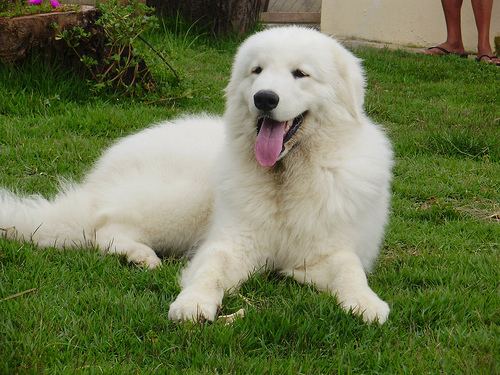

In [3]:
# input an ImageNet ID, 1~1000, indicating which class to load, we'll randomly choice one img in the class
# here we input 141
load_img_from_imagenet_sample_by_class(141, imagenet_labels=imagenet_id_label, data_filepath="data/sample_1000")

There are 1000 imgs, and 1000 classes.
load img data/sample_1000/141_n02104029.JPEG
ImageNet ID: 141


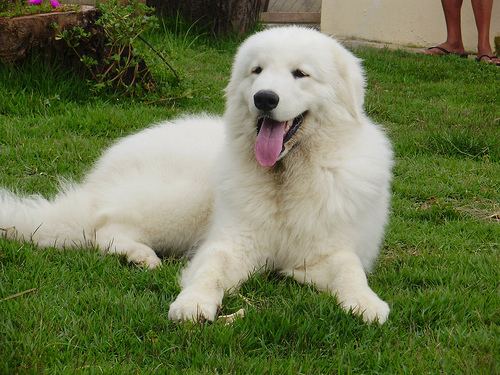

In [4]:
# you can ignore imagenet_labels and data_filepath(default: "data/sample_1000")
load_img_from_imagenet_sample_by_class(141)

There are 1000 imgs, and 1000 classes.
load img data/sample_1000/30_n02128925.JPEG
ImageNet ID: 30
WNID and class: ['n02128925', 'jaguar, panther, Panthera onca, Felis onca']


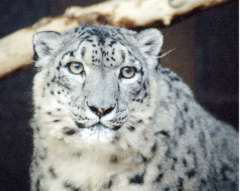

In [5]:
# input an index indicating which image file to load(0~999, if data_filepath="data/sample_1000")
# here we input 233
load_img_from_imagenet_sample_by_index(233, imagenet_labels=imagenet_id_label, data_filepath="data/sample_1000")

# use pre-trained model to predict

In [6]:
import torch
from torchvision import models
from torch.autograd import Variable
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

def preprocess_image(pil_im, resize_im=True):
    """
        Processes image for CNNs

    Args:
        PIL_img (PIL_img): PIL Image or numpy array to process
        resize_im (bool): Resize to 224 or not
    returns:
        im_as_var (torch variable): Variable that contains processed float tensor
    """
    # mean and std list for channels (Imagenet)
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]

    #ensure or transform incoming image to PIL image
    if type(pil_im) != Image.Image:
        try:
            pil_im = Image.fromarray(pil_im)
        except Exception as e:
            print("could not transform PIL_img to a PIL Image object. Please check input.")
            
    # Resize image
    if resize_im:
        pil_im = pil_im.resize((224, 224), Image.ANTIALIAS)
        
    im_as_arr = np.float32(pil_im)
    
    im_as_arr = im_as_arr.transpose(2, 0, 1)  # Convert array to D,W,H
    
    # Normalize the channels
    for channel, _ in enumerate(im_as_arr):
        im_as_arr[channel] /= 255
        im_as_arr[channel] -= mean[channel]
        im_as_arr[channel] /= std[channel]
    
    # Convert to float tensor
    im_as_ten = torch.from_numpy(im_as_arr).float()
    
    # Add one more channel to the beginning. Tensor shape = 1,3,224,224
    im_as_ten.unsqueeze_(0)
    
    # Convert to Pytorch variable
    im_as_var = Variable(im_as_ten, requires_grad=True)
    
    return im_as_var, im_as_arr.transpose(1,2,0)

pretrained_model = models.alexnet(pretrained=True)

There are 1000 imgs, and 1000 classes.
load img data/sample_1000/233_n02782093.JPEG
ImageNet ID: 233
WNID and class: ['n02782093', 'balloon']


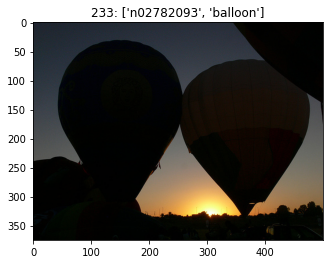

In [7]:
# load img
ID=233
input_img = load_img_from_imagenet_sample_by_class(ID, imagenet_labels=imagenet_id_label, data_filepath="data/sample_1000")

# show input img
plt.figure()
plt.title(str(ID)+": "+str(imagenet_id_label[str(ID)]))
plt.imshow(input_img)

# pre-process
input_img_tensor, input_img_arr=preprocess_image(input_img)

# run the model
model_output=pretrained_model(input_img_tensor)

In [8]:
# see the model prediction

model_output_arr=model_output.data.numpy()
label=np.argmax(model_output_arr)

print("predicted model output id is "+str(label))
print("In model output id dict, that is : "+str(label)+": "+str(modeloutput_id_label[str(label)]))
print("In imagenet id dict, that is : "+map_dict[str(label)]+": "+str(imagenet_id_label[map_dict[str(label)]]))

predicted model output id is 417
In model output id dict, that is : 417: ['n02782093', 'balloon']
In imagenet id dict, that is : 233: ['n02782093', 'balloon']
